# 분석 과제 정의
- 선수의 입장에서 어떻게 나의 가치를 올릴 수 있을까
- 선수의 입장에서 현재 나의 능력과 가치에 맞는 연봉을 받고 있나
- 선수의 입장에서 어떤 팀으로 가는 것이 최선일까(연봉 많이 주는 팀 vs 나를 가장 필요로 하는 팀)

- 팀의 입장에서 누구를 영입하는 것이 최선일까
- 팀의 입장에서 누구를 방출시켜야 이득일까



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('players_21.csv')

## 선수의 입장에서 어떻게 나의 가치를 올릴 수 있을까
- 가치는 현재 능력과 포텐션에 비례할 것
- 포지션별로 월클 선수들의 능력치를 비교하여, 포지션별로 가장 필요한 능력치 탑5 산출
- 내 포지션 월클 선수들의 탑5 능력치와 나의 능력치를 비교하여 가장 훈련이 시급한 능력 선정

<AxesSubplot:xlabel='overall', ylabel='value_eur'>

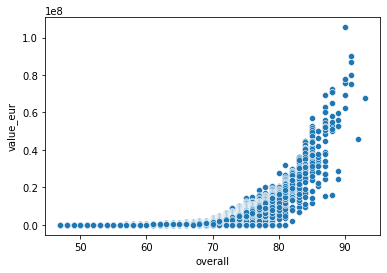

In [4]:
sns.scatterplot(x=data['overall'],y=data['value_eur'])

<AxesSubplot:xlabel='potential', ylabel='value_eur'>

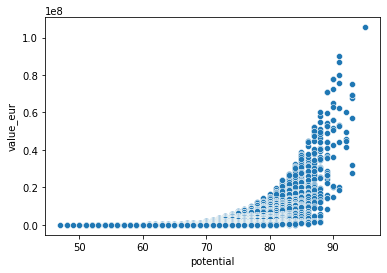

In [5]:
sns.scatterplot(x=data['potential'],y=data['value_eur'])

In [6]:
data.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       'league_name', 'league_rank', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves',
       'work_rate', 'body_type', 'real_face', 'release_clause_eur',
       'player_tags', 'team_position', 'team_jersey_number',
       'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',


In [7]:
ability_cols = ['pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

In [8]:
data[data['short_name']=='Kangin Lee']['player_positions']

2062    CAM, ST, LM
Name: player_positions, dtype: object

In [9]:
CAM_required_ability = data[data['player_positions'].str.find('CAM') != -1].sort_values(by='overall',ascending=False).head(20)[ability_cols].mean().sort_values(ascending=False).head(5).index
data[data['player_positions'].str.find('CAM') != -1].sort_values(by='overall',ascending=False).head(20)[CAM_required_ability].mean() - data[data['short_name']=='Kangin Lee'][CAM_required_ability]

,skill_ball_control,mentality_vision,attacking_short_passing,dribbling,skill_dribbling
2062,10.1,6.5,12.25,7.1,7.0


In [10]:
ST_required_ability = data[data['player_positions'].str.find('ST') != -1].sort_values(by='overall',ascending=False).head(20)[ability_cols].mean().sort_values(ascending=False).head(5).index
data[data['player_positions'].str.find('ST') != -1].sort_values(by='overall',ascending=False).head(20)[ST_required_ability].mean() - data[data['short_name']=='Kangin Lee'][ST_required_ability]

,mentality_positioning,attacking_finishing,movement_reactions,mentality_composure,shooting
2062,26.7,18.35,21.25,15.95,14.4


In [11]:
LM_required_ability = data[data['player_positions'].str.find('LM') != -1].sort_values(by='overall',ascending=False).head(20)[ability_cols].mean().sort_values(ascending=False).head(5).index
data[data['player_positions'].str.find('LM') != -1].sort_values(by='overall',ascending=False).head(20)[LM_required_ability].mean() - data[data['short_name']=='Kangin Lee'][LM_required_ability]

,skill_dribbling,skill_ball_control,dribbling,movement_acceleration,movement_agility
2062,7.05,7.25,6.2,16.95,-0.55


- 나의 가치를 올리기 위해서는 나의 포지션에 요구되는 능력을 키워야 한다.
- CAM 포지션으로써 요구되는 5개의 능력치 기준, 이강인 선수의 훈련 우선순위는 attacking_short_passing > skill_ball_control > dribbling > skill_dribbling > mentality_vision 이 합리적이다.
- ST 포지션으로써 요구되는 5개의 능력치 기준, 이강인 선수의 훈련 우선순위는 mentality_positioning > movement_reactions > attacking_finishing > mentality_composure > shooting 이 합리적이다.
- LM 포지션으로써 요구되는 5개의 능력치 기준, 이강인 선수의 훈련 우선순위는 movement_acceleration > skill_ball_control > skill_dribbling > dribbling > movement_agility 이 합리적이다.

## 선수의 입장에서 현재 나의 능력과 가치에 맞는 연봉을 받고 있나

In [12]:
data[data['short_name'] == 'Kangin Lee'][['overall','potential','value_eur', 'wage_eur']]

,overall,potential,value_eur,wage_eur
2062,74,84,9000000,16000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

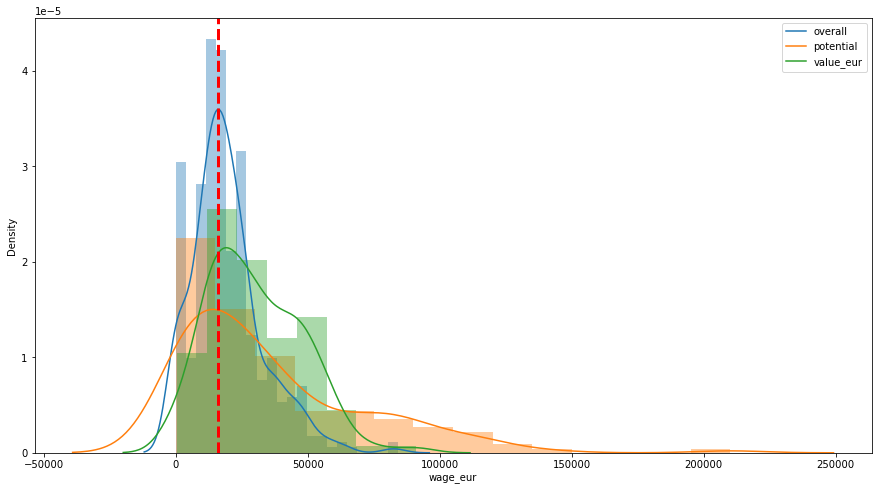

In [13]:
plt.figure(figsize=(15,8))
sns.distplot( data[data['overall']==74]['wage_eur'] )
sns.distplot( data[data['potential']==84]['wage_eur'] )
sns.distplot( data[data['value_eur']==9000000]['wage_eur'] )
plt.legend(['overall','potential','value_eur'])
plt.axvline(x=data[data['short_name']=='Kangin Lee']['wage_eur'].values, color='r', linestyle='--', linewidth=3)

- 이강인 선수는 현재 능력, 포텐셜, 가치에 합당한 연봉을 받고 있는 것으로 판단된다. 

## 선수의 입장에서 어떤 팀으로 가는 것이 최선일까(연봉을 후하게 주는 팀 vs 나를 가장 필요로 하는 팀)

In [14]:
data['wage_per_value'] = data['wage_eur'] / data['value_eur']

In [15]:
data.loc[data['wage_per_value']==np.inf,'wage_per_value'] = 0

In [16]:
data.groupby('club_name')['wage_per_value'].mean().sort_values(ascending=False).head(5)

club_name
Qingdao Huanghai F.C.                  0.027748
Al Fateh                               0.024326
Tianjin TEDA FC                        0.022162
Chongqing Dangdai Lifan FC SWM Team    0.022044
Al Fayha                               0.020872
Name: wage_per_value, dtype: float64

In [17]:
data.groupby('league_name')['wage_per_value'].mean().sort_values(ascending=False).head(5)

league_name
Chinese Super League            0.017084
Saudi Abdul L. Jameel League    0.016987
English Premier League          0.010640
English League Two              0.010205
English League Championship     0.009157
Name: wage_per_value, dtype: float64

- 연봉을 최우선 가치로 둔다면, 가치당 연봉을 가장 후하게 주는 팀은 Qingdao Huanghai F.C.이며, 리그는 Chinese Super League 이다.

In [18]:
data[data['short_name']=='Kangin Lee']['player_positions']

2062    CAM, ST, LM
Name: player_positions, dtype: object

In [19]:
series = data.groupby('club_name')['overall'].mean() - data[data['player_positions'].str.find('CAM') != -1].groupby('club_name')['overall'].mean()
series.sort_values(ascending=False).head(5)

club_name
Liverpool          13.575758
Odense Boldklub    10.407407
Angers SCO         10.174242
Valenciennes FC     9.923077
Bristol Rovers      9.464286
Name: overall, dtype: float64

In [20]:
series = data.groupby('club_name')['overall'].mean() - data[data['player_positions'].str.find('ST') != -1].groupby('club_name')['overall'].mean()
series.sort_values(ascending=False).head(5)

club_name
FC Voluntari         6.703704
Melbourne Victory    5.888889
SK Brann             5.836957
Lecce                5.291667
FC Luzern            4.962963
Name: overall, dtype: float64

In [21]:
series = data.groupby('club_name')['overall'].mean() - data[data['player_positions'].str.find('LM') != -1].groupby('club_name')['overall'].mean()
series.sort_values(ascending=False).head(5)

club_name
Liverpool                   13.575758
Real Madrid                 13.250000
Borussia Mönchengladbach    10.121212
FC Lugano                    9.777778
Wolverhampton Wanderers      6.636364
Name: overall, dtype: float64

- 나를 가장 필요로 하는 팀으로 가고 싶은 경우.
- 나를 가장 필요로 하는 팀은 팀 내 전체 선수들 능력치에 비해 내 포지션 선수들의 능력치가 떨어지는 상황일 것으로 생각된다.
- CAM 포지션을 가장 필요로 하는 팀은 Liverpool, ST 포지션을 가장 필요로 하는 팀은 FC Voluntari, LM 포지션을 가장 필요로 하는 팀은 Liverpool이다.

## 팀의 입장에서 누구를 영입하는 것이 최선일까
- 팀 전력에서 가장 뒤쳐지는 포지션의 선수들 영입
- 현재 몸값에 비해 가치가 높은 최고의 유망주들 영입

In [80]:
data[(data['club_name']=='Tottenham Hotspur')][['short_name','player_positions']]

,short_name,player_positions
21,H. Kane,ST
36,H. Lloris,GK
46,H. Son,"LM, CF"
87,T. Alderweireld,CB
147,S. Bergwijn,"LM, LW, RM"
152,D. Alli,"CAM, CM"
176,G. Bale,RW
200,Lucas Moura,"RM, CF"
212,Reguilón,"LB, LM"
216,G. Lo Celso,"CM, CAM"


In [81]:
FWs = [21,46,147,176,200,1506,]
MFs = [46,147,152,200,212,216,371,440,531,618,1506,1533,7336,]
DFs = [87,212,304,347,371,394,424,476,531,600,618,733,1506,1550,3817,6380,13090,13888,14700]
GKs = [36,965,1779,12054,]

In [93]:
print('토트넘 공격진 전력 : ',round(data.loc[FWs,'overall'].mean(),2))
print('토트넘 미드필더진 전력 : ',round(data.loc[MFs,'overall'].mean(),2))
print('토트넘 수비진 전력 : ',round(data.loc[DFs,'overall'].mean(),2))
print('토트넘 골키퍼 전력 : ',round(data.loc[GKs,'overall'].mean(),2))

토트넘 공격진 전력 :  83.17
토트넘 미드필더진 전력 :  79.62
토트넘 수비진 전력 :  75.58
토트넘 골키퍼 전력 :  75.5


- 현재 토트넘의 전력은 공격진 > 미드필더진 > 수비진 > 골키퍼 순서이다.
- 따라서 토트넘은 골키퍼와 수비진 전력을 우선 보강하는 것이 필요해 보인다. 

In [116]:
df = data[(data['club_name'] != 'Tottenham Hotspur') & (data['player_positions']=='GK') & (data['overall']>=80)][['short_name','age','club_name','overall','potential','wage_eur']]
df['Rookie_index'] = df['potential'] - df['overall']
df.sort_values(by='Rookie_index',ascending=False).head(5)

,short_name,age,club_name,overall,potential,wage_eur,Rookie_index
370,D. Henderson,23,Manchester United,80,87,70000,7
63,G. Donnarumma,21,Milan,85,92,34000,7
380,D. Livaković,25,Dinamo Zagreb,80,86,500,6
377,Unai Simón,23,Athletic Club de Bilbao,80,86,18000,6
145,Pau López,25,Roma,83,88,52000,5


In [146]:
df_positions = set( data.loc[DFs,'player_positions'].map(lambda x : x.split(',')[0]) )
df_positions

{'CB', 'CDM', 'CM', 'LB', 'LM', 'RB', 'RWB'}

In [179]:
def Discriminate_DF(row):
    for position in row['player_positions'].split(','):
        if position in df_positions:
            return True
    return False

In [184]:
indices = data[(data['club_name'] != 'Tottenham Hotspur') & (data['overall']>=80)].apply(Discriminate_DF,axis=1)
DF_players = data[(data['club_name'] != 'Tottenham Hotspur') & (data['overall']>=80)][indices]
DF_players['Rookie_index'] = DF_players['potential'] - DF_players['overall']
DF_players.sort_values(by='Rookie_index',ascending=False)[['short_name','age','club_name','overall','potential','wage_eur','Rookie_index']].head(5)

,short_name,age,club_name,overall,potential,wage_eur,Rookie_index
275,Cucurella,21,Getafe CF,81,89,28000,8
273,A. Davies,19,FC Bayern München,81,89,40000,8
274,H. Aouar,22,Olympique Lyonnais,81,89,65000,8
140,F. Valverde,21,Real Madrid,83,90,135000,7
278,M. Diaby,20,Bayer 04 Leverkusen,81,88,54000,7


- 골키퍼와 수비진 선수들을 영입하는데, 
- 현재 능력치가 80이상이여서 공격, 미드필더 전력에 뒤쳐지지 않으면서도
- 기대되는 포텐셜 능력치가 높은 유망주들을 영입하는 것이
- 팀 전력면에서도, 금전적인 면에서도 이득일 것이다. 

## 팀의 입장에서 누구를 방출시켜야 이득일까
- 현재 팀 전력보다 능력이 떨어지면서 포텐셜도 낮고 가치에 비해 연봉을 많이 받고 있는 선수

In [224]:
df = data.loc[FWs]
df['wage_per_overall'] = df['wage_eur'] / df['overall']
df[ (df['overall'] < df['overall'].mean())][['short_name','age','overall','wage_eur','wage_per_overall']].sort_values(by='wage_per_overall',ascending=False)

,short_name,age,overall,wage_eur,wage_per_overall
176,G. Bale,30,83,130000,1566.265060
200,Lucas Moura,27,83,120000,1445.783133
147,S. Bergwijn,22,83,105000,1265.060241
1506,R. Sessegnon,20,75,50000,666.666667


In [225]:
df = data.loc[MFs]
df['wage_per_overall'] = df['wage_eur'] / df['overall']
df[ (df['overall'] < df['overall'].mean())][['short_name','age','overall','wage_eur','wage_per_overall']].sort_values(by='wage_per_overall',ascending=False)

,short_name,age,overall,wage_eur,wage_per_overall
618,M. Sissoko,30,79,89000,1126.582278
531,H. Winks,24,79,69000,873.417722
1506,R. Sessegnon,20,75,50000,666.666667
1533,Gedson Fernandes,21,75,50000,666.666667
7336,J. Clarke,19,67,13000,194.029851


In [226]:
df = data.loc[DFs]
df['wage_per_overall'] = df['wage_eur'] / df['overall']
df[ (df['overall'] < df['overall'].mean())][['short_name','age','overall','wage_eur','wage_per_overall']].sort_values(by='wage_per_overall',ascending=False)

,short_name,age,overall,wage_eur,wage_per_overall
1550,J. Foyth,22,75,52000,693.333333
1506,R. Sessegnon,20,75,50000,666.666667
3817,J. Tanganga,21,71,29000,408.450704
6380,C. Carter-Vickers,22,68,22000,323.529412
13090,G. Marsh,21,62,8000,129.032258
14700,H. White,18,60,3000,50.000000
13888,D. Cirkin,18,61,3000,49.180328


In [227]:
df = data.loc[GKs]
df['wage_per_overall'] = df['wage_eur'] / df['overall']
df[ (df['overall'] < df['overall'].mean())][['short_name','age','overall','wage_eur','wage_per_overall']].sort_values(by='wage_per_overall',ascending=False)

,short_name,age,overall,wage_eur,wage_per_overall
1779,J. Hart,33,75,50000,666.666667
12054,A. Whiteman,21,63,7000,111.111111


- 현재 포지션별 전력에 뒤쳐지면서, 능력에 비해 연봉을 많이 받고 있는 선수들이 방출 대상일 것이다.